In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime, time

El presente informe explica y da a conocer resultados acerca la simulación de una pila de arena mediante un método matemático simplifado. La idea es que si uno va formando una pila de arena llega un momento en que se produce un pequeño derrumbe y la arena de esa pila se derrama hacia lugares vecinos, éstos a su vez se pueden derrumbar y el proceso continua hasta estabilizarse.

El modelo matemático que lo representa es que suponemos que la arena se deposita sobre una superficie plana, la cual está dividida en pequeñas celdas formando un tablero. La regla a seguir es que si en una celda hay 4 o más granos, se le quitan 4 granos, que se reparten equitativamente entre las celdas vecinas en los 4 puntos cardinales.

**PARTE 1**

La primera parte de ésta tarea consistió en que mediante un programa en python se tuvo que simular el proceso de las pilas de arena abelianas, y como método se utilizó en que si un número en una celda era igual o mayor que 4, entonces se restaba cuatro y se llenaban las casillas de los puntos cardinales de la celda mencionada con un grano más.

Lo descrito, se puede ver como:

Dígame una cantidad de granos de arena: 20000
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
El número de iteraciones es: 7274878
Ejecutado en: 00:04:43


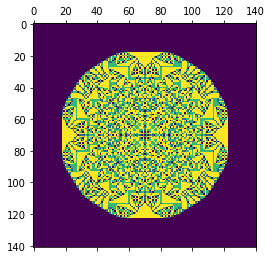

In [13]:
#PARTE 1
startTime = datetime.datetime.now() #medimos el tiempo inicial
cantidad = int(input("Dígame una cantidad de granos de arena: ")) #pido una cantidad de granos

if int(math.sqrt(cantidad))%2==0: 
  dimension=int(math.sqrt(cantidad) +1)
  matriz=np.zeros((dimension, dimension))
elif int(math.sqrt(cantidad))%2!=0: 
  dimension=int(math.sqrt(cantidad))
  matriz=np.zeros((dimension, dimension))

matriz[(dimension//2)][(dimension//2)]=cantidad

def posicion_por_colapsar(matriz): # recorrer hasta que no haya ningun numero mayor o igual que 4
  for i in range(0,dimension):
    for j in range(0,dimension):
      if matriz[i][j]>=4:
        return True 
contador=0
while posicion_por_colapsar(matriz):
  for i in range (0, dimension):
    for j in range (0, dimension):
      if matriz[i][j]>=4:
        matriz[i][j]=matriz[i][j] -4
        matriz[i+1][j]=matriz[i+1][j] +1
        matriz[i-1][j]=matriz[i-1][j] +1
        matriz[i][j+1]=matriz[i][j+1] +1
        matriz[i][j-1]=matriz[i][j-1] +1
        contador=contador +1
print (matriz)
print("El número de iteraciones es:", contador)

endTime = datetime.datetime.now()
print("Ejecutado en: " + str(time.strftime('%H:%M:%S', time.gmtime((endTime - startTime).seconds ))))

plt.matshow(matriz)
plt.show()


**Descripción del código**:

Se mide el tiempo inicial para luego calcular cuanto demoro en obtener lo que quiero y se pide una cantidad de granos de arena.

Se calcula la dimension del tablero tal que no se salgan granos de arena de allí, y ésta es sqrt(cantidad_granos) x sqrt(cantidad_granos). Se obtuvo a prueba y error, y si bien no es exacto, se alcanza a dimensionar la imagen que queremos obtener.

Se creó con la dimension anteriormente mencionanada una matriz de ceros, tal que siempre ésta matriz tenga dimensiones impares para poder tener una posición del centro que será con la se comenzará el programa.

Se fija el número de cantidad de granos indicado en el centro de la matriz de ceros.

Se define una función que revise la matriz anteriormente mencionada y devuelva el booleano true si aún quedan casillas mayores o iguales a 4, es decir, recorre la matriz hasta que no haya ningún número en alguna casilla mayor o igual a 4.

Así, se cumple que mientras se cumpla la condición de la función anterior, se le restará 4 a la casilla que se está estudiando y se le sumará 1 a las casillas de los 4 puntos cardinales, y se iterará hasta que no haya ninguna casilla del tablero con un número mayor o igual a cuatro.

Se imprime la matriz y el número de iteraciones, además se fija que en ese momento se terminó el programa y calcula el tiempo que demoró y también lo imprime.



Para N=1000, la imagen obtenida se adjunta en otro documento.

Para N=128, la imagen y matriz obtenida se adjunta en otro documento.

Para N=20000, que es la mayor cantidad de granos con que se corrió el programa, la imagen se adjunta en otro documento.


**PARTE 2**

En esta parte, se trata de simular también las pilas de arena abelianas, sin embargo, el método cambia un poco, ya que al encontrar una celda con un número igual o mayor que 4, en vez de restar, quita lo que más puede, y lo distribuye a las celdas de los cuatro puntos cardinales.

En comparación con la parte 1, en vez de restar 4 al número de la celda que se estaba analizando, se dividió en 4. La celda de al medio corresponde al resto de la división y a las celdas de los cuatro puntos cardinales se les dio el valor del resultado de la división.

Así por ejemplo si tenemos en la celda estudiada el número 18, dividimos éste en 4, obteniendo como resultado 4 y resto dos. El número que irá en la celda estudiada entonces será 2, la celda norte tendrá un valor de +4, al igual que la celda sur, este y oeste. Se continúa iterando hasta que no existe ninguna celda con un valor de 4 o más.

Dígame una cantidad de granos de arena: 20000
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
El número de iteraciones es: 4746155
Ejecutado en: 00:01:02


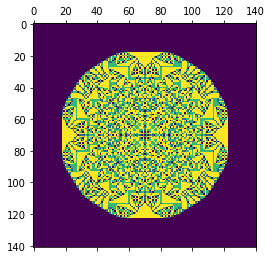

In [16]:
#PARTE 2
startTime2 = datetime.datetime.now()
cantidad2 = int(input("Dígame una cantidad de granos de arena: "))

if int(math.sqrt(cantidad2))%2==0:
  dimension2=int(math.sqrt(cantidad2) +1)
  matriz2=np.zeros((dimension2, dimension2))
if int(math.sqrt(cantidad2))%2!=0: 
  dimension2=int(math.sqrt(cantidad2))
  matriz2=np.zeros((dimension2, dimension2))

matriz2[(dimension2//2)][(dimension2//2)]=cantidad2

def posicion_por_colapsar2(matriz2): # recorrer hasta que no haya ningun numero mayor o igual que 4
  for i in range(0,dimension2):
    for j in range(0,dimension2):
      if matriz2[i][j]>=4:
        return True 

contador2=0
while posicion_por_colapsar2(matriz2):
  for i in range (0, dimension2):
    for j in range (0, dimension2):
      if matriz2[i][j]>=4:
        matriz2[i+1][j]= matriz2[i+1][j] + (matriz2[i][j]//4) #+resultadodivision
        matriz2[i-1][j]= matriz2[i-1][j] + (matriz2[i][j]//4) #+resultadodivision
        matriz2[i][j+1]= matriz2[i][j+1] + (matriz2[i][j]//4)  #+resultadodivision
        matriz2[i][j-1]= matriz2[i][j-1] + (matriz2[i][j]//4) #+resultadodivision
        matriz2[i][j]=(matriz2[i][j]%4) #resto al dividir por 4
        contador2=contador2 +1
print (matriz2)
print("El número de iteraciones es:", contador2)
endTime2 = datetime.datetime.now()
print("Ejecutado en: " + str(time.strftime('%H:%M:%S', time.gmtime((endTime2 - startTime2).seconds ))))
plt.matshow(matriz2)
plt.show()


**Descripción del código**:

Se mide el tiempo inicial para luego calcular cuanto demoro en obtener lo que quiero y se pide una cantidad de granos de arena.

Se calcula la dimension del tablero tal que no se salgan granos de arena de allí, y ésta es sqrt(cantidad_granos) x sqrt(cantidad_granos). Se obtuvo a prueba y error, y si bien no es exacto, se alcanza a dimensionar la imagen que queremos obtener.

Se creó con la dimension anteriormente mencionanada una matriz de ceros, tal que siempre ésta matriz tenga dimensiones impares para poder tener una posición del centro que será con la se comenzará el programa.

Se fija el número de cantidad de granos indicado en el centro de la matriz de ceros.

Se define una función que revise la matriz anteriormente mencionada y devuelva el booleano true si aún quedan casillas mayores o iguales a 4, es decir, recorre la matriz hasta que no haya ningún número en alguna casilla mayor o igual a 4.

Así, se cumple que mientras se cumpla la condición de la función anterior, el número que está en la casilla estudiada se dividirá en cuatro, el resto de ésta división se fijará en la casilla que se estaba estudiando, mientras que el resultado de ésta división, se sumará en los cuatro puntos cardinales de la casilla que estaba en estudio. Se iterará hasta que no hayan casillas con número mayores o iguales a 4.

Se imprime la matriz y el número de iteraciones, además se fija que en ese momento se terminó el programa y calcula el tiempo que demoró y también lo imprime.

Para N=1000, la imagen obtenida se adjunta en otro documento.

Para N=128, la imagen y matriz obtenida se adjunta en otro documento.

Para N=20000, que es la mayor cantidad de granos con que se corrió el programa, la imagen se adjunta en otro documento.

**PARTE 3**

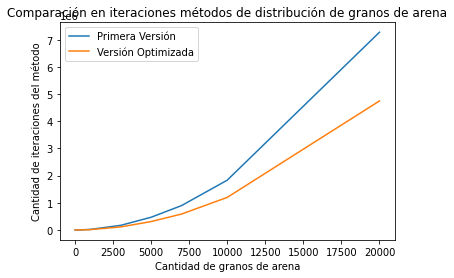

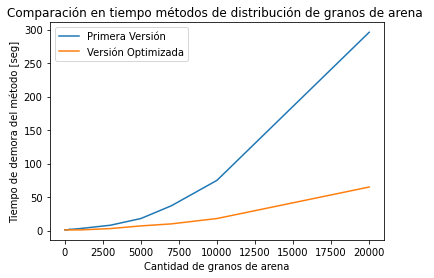

In [7]:
#primer método
vector_cantidad=[4,20,50,80,100,130,150,200,300,500,1000,3000,5000,7000,10000,20000 ]
vector_contador=[1,10,49,131,225,342,424,758,1685,4702,18226,168160,466188,895562,1830917,7274878]
vector_tiempo=[1,1,1,1,1,1,1,1,2,2,3,8,18,37,75,296]


#segundo método
vector_cantidad2=[4,20,50,80,100,130,150,200,300,500,1000,3000,5000,7000,10000,20000]
vector_contador2=[1,6,28,83,149,227,272,484,1088,3031,11724,110729,307656,584458,1196817,4746155]
vector_tiempo2=[1,1,1,1,1,1,1,1,1,1,1,3,7,10,18,65]

plt.plot(vector_cantidad,vector_contador, label='Primera Versión')
plt.plot(vector_cantidad,vector_contador2,label='Versión Optimizada')
plt.legend(loc="upper left")
plt.xlabel("Cantidad de granos de arena")
plt.ylabel("Cantidad de iteraciones del método")
plt.title("Comparación en iteraciones métodos de distribución de granos de arena")
plt.show()

plt.plot(vector_cantidad,vector_tiempo, label='Primera Versión')
plt.plot(vector_cantidad,vector_tiempo2,label='Versión Optimizada')
plt.legend(loc="upper left")
plt.xlabel("Cantidad de granos de arena")
plt.ylabel("Tiempo de demora del método [seg]")
plt.title("Comparación en tiempo métodos de distribución de granos de arena ")
plt.show()


Ahora, en una tabla, quedaría como sigue:

Para el primer método:

In [9]:
titles = ['#granos', '#iteraciones', 'Segundos']
data = [titles] + list(zip(vector_cantidad, vector_contador, vector_tiempo))

for i, d in enumerate(data):
    line = '|'.join(str(x).ljust(12) for x in d)
    print(line)
    if i == 0:
        print('-' * len(line))

#granos     |#iteraciones|Segundos    
--------------------------------------
4           |1           |1           
20          |10          |1           
50          |49          |1           
80          |131         |1           
100         |225         |1           
130         |342         |1           
150         |424         |1           
200         |758         |1           
300         |1685        |2           
500         |4702        |2           
1000        |18226       |3           
3000        |168160      |8           
5000        |466188      |18          
7000        |895562      |37          
10000       |1830917     |75          
20000       |7274878     |296         


Para el segundo método:

In [10]:
titles = ['#granos', '#iteraciones', 'Segundos']
data = [titles] + list(zip(vector_cantidad2, vector_contador2, vector_tiempo2))

for i, d in enumerate(data):
    line = '|'.join(str(x).ljust(12) for x in d)
    print(line)
    if i == 0:
        print('-' * len(line))

#granos     |#iteraciones|Segundos    
--------------------------------------
4           |1           |1           
20          |6           |1           
50          |28          |1           
80          |83          |1           
100         |149         |1           
130         |227         |1           
150         |272         |1           
200         |484         |1           
300         |1088        |1           
500         |3031        |1           
1000        |11724       |1           
3000        |110729      |3           
5000        |307656      |7           
7000        |584458      |10          
10000       |1196817     |18          
20000       |4746155     |65          


Como se puede observar, el segundo método es mucho más eficiente en cuanto a cantidad de iteraciones y cantidad de segundos que demora el programa en comparación con el primer método.

Otra forma en que podría ser más eficiente 